##  Forecasting Of Stock Market Using Stacked LSTM and Decision Tree

Forecasting of **Goldman Sachs** and **Morgan Stanley** stocks using stacked LSTM

### Goldman Sachs

Using tiingo's API (other sites like yahoo finance could also have been used but the no. of features extracted is more in tiingo) to collect stock market data of the comapny using developer's personal key

In [89]:
import pandas_datareader as pdr
key="75887c359322cd76d4a76f0caa25dac9f5a72773"

In [157]:
# Collection of Data 

gs_data = pdr.get_data_tiingo('GS', start='JAN-01-2010',api_key=key)

/home/swattik/.local/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [158]:
gs_data.to_csv('GS.csv')

In [159]:
import pandas as pd

In [160]:
gs_data=pd.read_csv('GS.csv')

In [161]:
gs_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GS,2010-01-04 00:00:00+00:00,173.08,174.25,169.51,170.05,9135000,146.098542,147.086150,143.085069,143.540889,9135000,0.0,1.0
1,GS,2010-01-05 00:00:00+00:00,176.14,176.26,172.57,173.00,11659400,148.681518,148.782811,145.668046,146.031013,11659400,0.0,1.0
2,GS,2010-01-06 00:00:00+00:00,174.26,175.38,173.76,175.38,7381100,147.094591,148.039995,146.672537,148.039995,7381100,0.0,1.0
3,GS,2010-01-07 00:00:00+00:00,177.67,178.75,173.95,174.32,8727400,149.973006,150.884645,146.832917,147.145238,8727400,0.0,1.0
4,GS,2010-01-08 00:00:00+00:00,174.31,177.43,173.95,176.33,7268100,147.136797,149.770420,146.832917,148.841899,7268100,0.0,1.0


In [162]:
gs_data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
2904,GS,2021-07-19 00:00:00+00:00,354.72,355.1900,349.00,354.00,4394635,354.72,355.1900,349.00,354.00,4394635,0.0,1.0
2905,GS,2021-07-20 00:00:00+00:00,364.76,367.3100,351.54,352.27,2937859,364.76,367.3100,351.54,352.27,2937859,0.0,1.0
2906,GS,2021-07-21 00:00:00+00:00,373.50,374.9000,367.93,368.04,2398848,373.50,374.9000,367.93,368.04,2398848,0.0,1.0
2907,GS,2021-07-22 00:00:00+00:00,372.71,373.6938,368.45,372.30,1887130,372.71,373.6938,368.45,372.30,1887130,0.0,1.0
2908,GS,2021-07-23 00:00:00+00:00,374.05,378.0000,371.38,374.59,1707088,374.05,378.0000,371.38,374.59,1707088,0.0,1.0


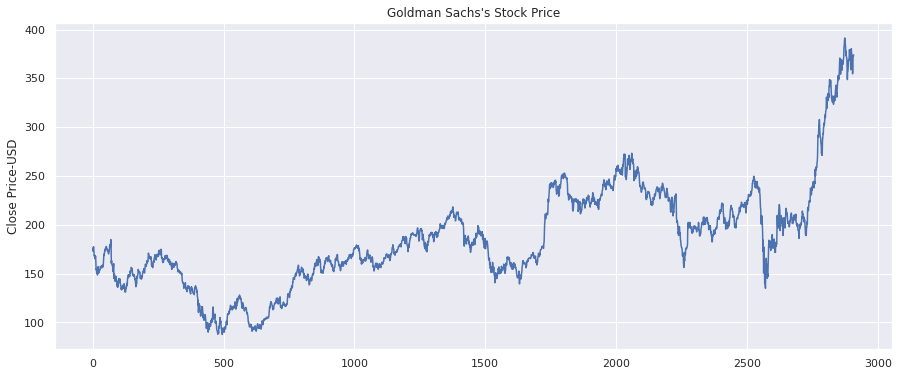

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
sns.set()
plt.title("Goldman Sachs's Stock Price")

plt.ylabel('Close Price-USD')
plt.plot(gs_data["close"])

In [164]:
gs_data[['divCash','splitFactor']]

,divCash,splitFactor
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
2904,0.0,1.0
2905,0.0,1.0
2906,0.0,1.0
2907,0.0,1.0


As we can see divCash and splitFactor not change their values at all hence they are excluded from the list of features

In [165]:
print('Total Days = ',gs_data.shape)

Total Days =  (2909, 14)


Pandas pct_change() method is applied on series with numeric data to calculate Percentage change after n number of elements. By default, it calculates percentage change of current element from the previous element. ... First, n(n=period) values are always NaN, since there is no previous value to calculate change.

Here a moving average is performed over a period of 60 days

We are going to average 60 days in the future compute the relative returns and see if it is positive or negative


**EXPLANATION-**
We are seeing the percentage change of 'close' column in the future to see what will be the change in percentage of the closing stock price after taking 60 days into consideration starting from 2010-01-04 and then by using -60 in the shift() function we are shifting the values of the 'return' column 60 dates up essentially showing what will be the percentage change of the closing stock prices 60 days from now 

In [166]:
gs_data['Return'] = gs_data['close'].pct_change(60).shift(-60)
List_of_Features = ['open','high','low','close','volume','adjClose','adjHigh','adjLow','adjOpen','adjVolume']

In [167]:
gs_data


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Return
0,GS,2010-01-04 00:00:00+00:00,173.08,174.2500,169.51,170.05,9135000,146.098542,147.086150,143.085069,143.540889,9135000,0.0,1.0,-0.014155
1,GS,2010-01-05 00:00:00+00:00,176.14,176.2600,172.57,173.00,11659400,148.681518,148.782811,145.668046,146.031013,11659400,0.0,1.0,-0.033610
2,GS,2010-01-06 00:00:00+00:00,174.26,175.3800,173.76,175.38,7381100,147.094591,148.039995,146.672537,148.039995,7381100,0.0,1.0,-0.006312
3,GS,2010-01-07 00:00:00+00:00,177.67,178.7500,173.95,174.32,8727400,149.973006,150.884645,146.832917,147.145238,8727400,0.0,1.0,-0.026848
4,GS,2010-01-08 00:00:00+00:00,174.31,177.4300,173.95,176.33,7268100,147.136797,149.770420,146.832917,148.841899,7268100,0.0,1.0,0.011761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,GS,2021-07-19 00:00:00+00:00,354.72,355.1900,349.00,354.00,4394635,354.720000,355.190000,349.000000,354.000000,4394635,0.0,1.0,NaN
2905,GS,2021-07-20 00:00:00+00:00,364.76,367.3100,351.54,352.27,2937859,364.760000,367.310000,351.540000,352.270000,2937859,0.0,1.0,NaN
2906,GS,2021-07-21 00:00:00+00:00,373.50,374.9000,367.93,368.04,2398848,373.500000,374.900000,367.930000,368.040000,2398848,0.0,1.0,NaN
2907,GS,2021-07-22 00:00:00+00:00,372.71,373.6938,368.45,372.30,1887130,372.710000,373.693800,368.450000,372.300000,1887130,0.0,1.0,NaN


If return is positive then the value of return is 1 else vice versa


In [168]:
import numpy as np
X = gs_data[List_of_Features]
y = np.where(gs_data.Return > 0, 1, 0)

In [169]:
X

,open,high,low,close,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,170.05,174.2500,169.51,173.08,9135000,146.098542,147.086150,143.085069,143.540889,9135000
1,173.00,176.2600,172.57,176.14,11659400,148.681518,148.782811,145.668046,146.031013,11659400
2,175.38,175.3800,173.76,174.26,7381100,147.094591,148.039995,146.672537,148.039995,7381100
3,174.32,178.7500,173.95,177.67,8727400,149.973006,150.884645,146.832917,147.145238,8727400
4,176.33,177.4300,173.95,174.31,7268100,147.136797,149.770420,146.832917,148.841899,7268100
...,...,...,...,...,...,...,...,...,...,...
2904,354.00,355.1900,349.00,354.72,4394635,354.720000,355.190000,349.000000,354.000000,4394635
2905,352.27,367.3100,351.54,364.76,2937859,364.760000,367.310000,351.540000,352.270000,2937859
2906,368.04,374.9000,367.93,373.50,2398848,373.500000,374.900000,367.930000,368.040000,2398848
2907,372.30,373.6938,368.45,372.71,1887130,372.710000,373.693800,368.450000,372.300000,1887130


In [170]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2036, 10)
(873, 10)
(2036,)
(873,)


In [172]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 6)
treeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

 min_samples_leaf specifies the minimum number of samples required to be at a leaf node.

Max Depth. Controls the maximum depth of the tree that will be created. It can also be described as the length of the longest path from the tree root to a leaf.


In [173]:
y_pred = treeClassifier.predict(X_test)

In [174]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.32      0.45       383
           1       0.63      0.90      0.74       490

    accuracy                           0.65       873
   macro avg       0.68      0.61      0.59       873
weighted avg       0.67      0.65      0.61       873



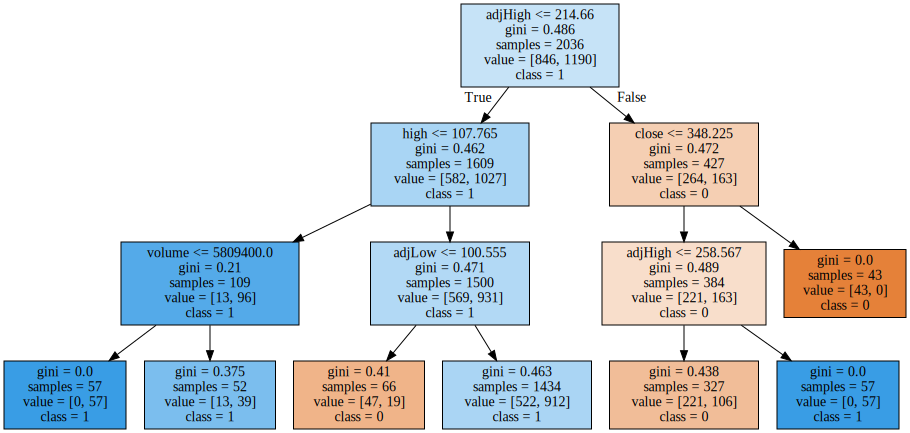

In [175]:
from sklearn import tree
import graphviz
data =tree.export_graphviz(treeClassifier,filled=True,feature_names=List_of_Features,class_names = np.array(['0','1'])) 
graphviz.Source(data)

### GiNi Index?

In [176]:
y_test_score = get_auc_scores(treeClassifier, X_train, X_test, y_train, y_test)

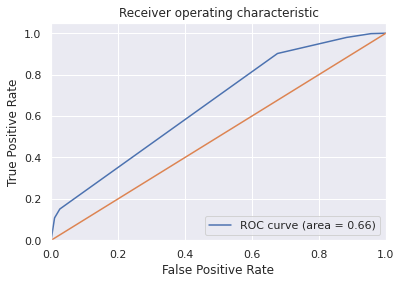

In [177]:
plot_roc_curve(y_test, y_test_score)

In [178]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [179]:
gs_data.shape

(2909, 15)

In [180]:
gs_data1=gs_data.reset_index()['close']

In [181]:
gs_data.shape

(2909, 15)

In [182]:
gs_data1

0       173.08
1       176.14
2       174.26
3       177.67
4       174.31
         ...  
2904    354.72
2905    364.76
2906    373.50
2907    372.71
2908    374.05
Name: close, Length: 2909, dtype: float64

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
gs_data1=scaler.fit_transform(np.array(gs_data1).reshape(-1,1))

In [184]:
print(gs_data1)

[[0.28108642]
 [0.29116049]
 [0.28497119]
 ...
 [0.94090535]
 [0.93830453]
 [0.94271605]]


In [185]:
##splitting dataset into train and test split
training_size=int(len(gs_data1)*0.65)
test_size=len(gs_data1)-training_size
train_data,test_data=gs_data1[0:training_size,:],gs_data1[training_size:len(gs_data1),:1]

In [186]:
training_size,test_size

(1890, 1019)

In [187]:
train_data

array([[0.28108642],
       [0.29116049],
       [0.28497119],
       ...,
       [0.45952263],
       [0.46202469],
       [0.45758025]])

In [188]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [189]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [190]:
print(X_train.shape), print(y_train.shape)

(1789, 100)
(1789,)


(None, None)

In [191]:
print(X_test.shape), print(y_test.shape)

(918, 100)
(918,)


(None, None)

In [192]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [223]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [224]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [225]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [226]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [240]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 [==============================] - 20s 406ms/step - loss: 0.0116 - val_loss: 0.0079
Epoch 2/100
28/28 [==============================] - 9s 331ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 3/100
28/28 [==============================] - 8s 302ms/step - loss: 6.2718e-04 - val_loss: 0.0029
Epoch 4/100
28/28 [==============================] - 9s 319ms/step - loss: 5.7443e-04 - val_loss: 0.0020
Epoch 5/100
28/28 [==============================] - 9s 325ms/step - loss: 5.3184e-04 - val_loss: 0.0019
Epoch 6/100
28/28 [==============================] - 9s 318ms/step - loss: 5.0569e-04 - val_loss: 0.0020
Epoch 7/100
28/28 [==============================] - 8s 304ms/step - loss: 4.7111e-04 - val_loss: 0.0018
Epoch 8/100
28/28 [==============================] - 8s 305ms/step - loss: 4.4972e-04 - val_loss: 0.0019
Epoch 9/100
28/28 [==============================] - 9s 320ms/step - loss: 4.1454e-04 - val_loss: 0.0020
Epoch 10/100
28/28 [==============================] - 9s 311ms

In [229]:
import tensorflow as tf

In [242]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [243]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [244]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.97782288409346

In [245]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

240.59035256318407

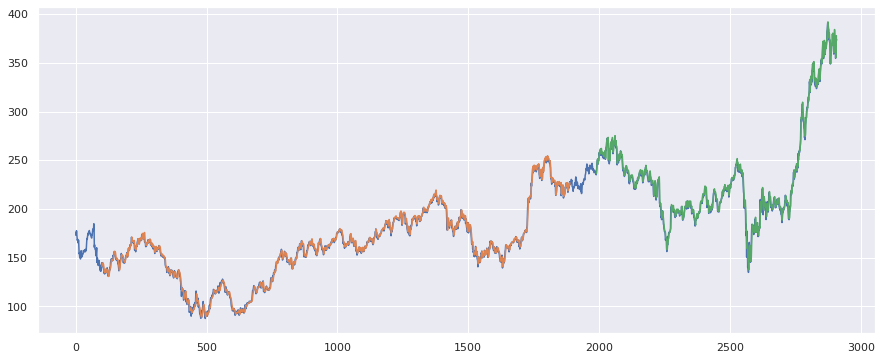

In [246]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(gs_data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(gs_data1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(gs_data1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(gs_data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [247]:
len(test_data)

1019

In [248]:
x_input=test_data[919:].reshape(1,-1)
x_input.shape


(1, 100)

In [249]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [250]:
temp_input

[0.8122798353909465,
 0.795358024691358,
 0.7890370370370371,
 0.8114897119341563,
 0.7996378600823043,
 0.837267489711934,
 0.8375308641975309,
 0.8596213991769547,
 0.8505349794238682,
 0.8362469135802467,
 0.8469135802469135,
 0.8569547325102881,
 0.8444444444444444,
 0.8284115226337448,
 0.8035226337448559,
 0.7932510288065843,
 0.7995061728395062,
 0.789102880658436,
 0.7836378600823045,
 0.8043127572016461,
 0.7878189300411523,
 0.7899259259259258,
 0.7764279835390947,
 0.7880164609053498,
 0.7863374485596707,
 0.8014485596707818,
 0.8003621399176956,
 0.803753086419753,
 0.7900576131687244,
 0.8153086419753087,
 0.825843621399177,
 0.8382222222222223,
 0.8407901234567899,
 0.8038847736625513,
 0.8150452674897118,
 0.8004938271604939,
 0.828477366255144,
 0.8422057613168724,
 0.8524444444444444,
 0.8573168724279835,
 0.8733168724279835,
 0.8584362139917695,
 0.8640658436213992,
 0.8630123456790123,
 0.8886255144032921,
 0.9161152263374487,
 0.932312757201646,
 0.925037037037037,


In [251]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.94021744]
101
1 day input [0.79535802 0.78903704 0.81148971 0.79963786 0.83726749 0.83753086
 0.8596214  0.85053498 0.83624691 0.84691358 0.85695473 0.84444444
 0.82841152 0.80352263 0.79325103 0.79950617 0.78910288 0.78363786
 0.80431276 0.78781893 0.78992593 0.77642798 0.78801646 0.78633745
 0.80144856 0.80036214 0.80375309 0.79005761 0.81530864 0.82584362
 0.83822222 0.84079012 0.80388477 0.81504527 0.80049383 0.82847737
 0.84220576 0.85244444 0.85731687 0.87331687 0.85843621 0.86406584
 0.86301235 0.88862551 0.91611523 0.93231276 0.92503704 0.89619753
 0.87802469 0.89254321 0.92533333 0.92691358 0.91147325 0.89112757
 0.89573663 0.91706996 0.92375309 0.91130864 0.92082305 0.933893
 0.93603292 0.97033745 0.97362963 0.99101235 1.         0.98916872
 0.97777778 0.97145679 0.94235391 0.95588477 0.93899588 0.93366255
 0.9326749  0.90139918 0.85968724 0.88836214 0.88832922 0.8999177
 0.92526749 0.92533333 0.9251358  0.93800823 0.9607572  0.9458107
 0.94307819 0.92892181 0.92171193 0.8

8 day output [[0.9648563]]
9 day input [0.83624691 0.84691358 0.85695473 0.84444444 0.82841152 0.80352263
 0.79325103 0.79950617 0.78910288 0.78363786 0.80431276 0.78781893
 0.78992593 0.77642798 0.78801646 0.78633745 0.80144856 0.80036214
 0.80375309 0.79005761 0.81530864 0.82584362 0.83822222 0.84079012
 0.80388477 0.81504527 0.80049383 0.82847737 0.84220576 0.85244444
 0.85731687 0.87331687 0.85843621 0.86406584 0.86301235 0.88862551
 0.91611523 0.93231276 0.92503704 0.89619753 0.87802469 0.89254321
 0.92533333 0.92691358 0.91147325 0.89112757 0.89573663 0.91706996
 0.92375309 0.91130864 0.92082305 0.933893   0.93603292 0.97033745
 0.97362963 0.99101235 1.         0.98916872 0.97777778 0.97145679
 0.94235391 0.95588477 0.93899588 0.93366255 0.9326749  0.90139918
 0.85968724 0.88836214 0.88832922 0.8999177  0.92526749 0.92533333
 0.9251358  0.93800823 0.9607572  0.9458107  0.94307819 0.92892181
 0.92171193 0.89297119 0.93517695 0.96395062 0.94906996 0.94386831
 0.94041152 0.91226337 

16 day output [[0.990482]]
17 day input [0.78910288 0.78363786 0.80431276 0.78781893 0.78992593 0.77642798
 0.78801646 0.78633745 0.80144856 0.80036214 0.80375309 0.79005761
 0.81530864 0.82584362 0.83822222 0.84079012 0.80388477 0.81504527
 0.80049383 0.82847737 0.84220576 0.85244444 0.85731687 0.87331687
 0.85843621 0.86406584 0.86301235 0.88862551 0.91611523 0.93231276
 0.92503704 0.89619753 0.87802469 0.89254321 0.92533333 0.92691358
 0.91147325 0.89112757 0.89573663 0.91706996 0.92375309 0.91130864
 0.92082305 0.933893   0.93603292 0.97033745 0.97362963 0.99101235
 1.         0.98916872 0.97777778 0.97145679 0.94235391 0.95588477
 0.93899588 0.93366255 0.9326749  0.90139918 0.85968724 0.88836214
 0.88832922 0.8999177  0.92526749 0.92533333 0.9251358  0.93800823
 0.9607572  0.9458107  0.94307819 0.92892181 0.92171193 0.89297119
 0.93517695 0.96395062 0.94906996 0.94386831 0.94041152 0.91226337
 0.87907819 0.91213169 0.94090535 0.93830453 0.94271605 0.94021744
 0.94276619 0.94551063

24 day output [[1.0117384]]
25 day input [0.80144856 0.80036214 0.80375309 0.79005761 0.81530864 0.82584362
 0.83822222 0.84079012 0.80388477 0.81504527 0.80049383 0.82847737
 0.84220576 0.85244444 0.85731687 0.87331687 0.85843621 0.86406584
 0.86301235 0.88862551 0.91611523 0.93231276 0.92503704 0.89619753
 0.87802469 0.89254321 0.92533333 0.92691358 0.91147325 0.89112757
 0.89573663 0.91706996 0.92375309 0.91130864 0.92082305 0.933893
 0.93603292 0.97033745 0.97362963 0.99101235 1.         0.98916872
 0.97777778 0.97145679 0.94235391 0.95588477 0.93899588 0.93366255
 0.9326749  0.90139918 0.85968724 0.88836214 0.88832922 0.8999177
 0.92526749 0.92533333 0.9251358  0.93800823 0.9607572  0.9458107
 0.94307819 0.92892181 0.92171193 0.89297119 0.93517695 0.96395062
 0.94906996 0.94386831 0.94041152 0.91226337 0.87907819 0.91213169
 0.94090535 0.93830453 0.94271605 0.94021744 0.94276619 0.94551063
 0.94870436 0.95200372 0.95524931 0.95844585 0.96163762 0.96485633
 0.9681083  0.9713816  0.

In [252]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [253]:
import matplotlib.pyplot as plt

In [254]:
len(gs_data1)

2909

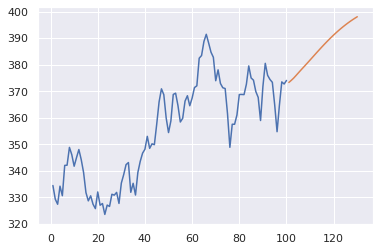

In [256]:
plt.plot(day_new,scaler.inverse_transform(gs_data1[2809:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

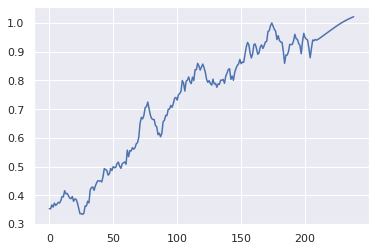

In [259]:
gs_data3=gs_data1.tolist()
gs_data3.extend(lst_output)
plt.plot(gs_data3[2700:])

In [260]:
gs_data3=scaler.inverse_transform(gs_data3).tolist()

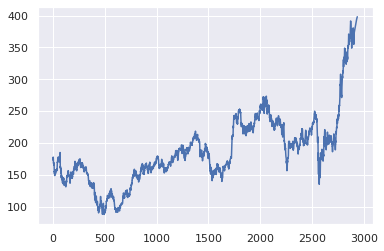

In [261]:
plt.plot(gs_data3)

## Morgan Stanley

In [268]:
ms_data = pdr.get_data_tiingo('MS', start='JAN-01-2010',api_key=key)

/home/swattik/.local/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [269]:
ms_data.to_csv('MS.csv')

In [193]:
ms=pd.read_csv('MS.csv')
ms.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MS,2010-01-04 00:00:00+00:00,30.91,31.968,30.63,30.70,20371000,25.518330,26.391782,25.287171,25.344961,20371000,0.0,1.0
1,MS,2010-01-05 00:00:00+00:00,32.04,32.130,30.93,31.01,22523400,26.451223,26.525524,25.534842,25.600887,22523400,0.0,1.0
2,MS,2010-01-06 00:00:00+00:00,32.45,32.590,31.79,31.97,17028500,26.789706,26.905286,26.244831,26.393433,17028500,0.0,1.0
3,MS,2010-01-07 00:00:00+00:00,32.92,33.270,32.27,32.46,18693000,27.177724,27.466673,26.641104,26.797962,18693000,0.0,1.0
4,MS,2010-01-08 00:00:00+00:00,32.25,32.820,31.98,32.60,15993400,26.624593,27.095167,26.401689,26.913542,15993400,0.0,1.0


In [194]:
ms.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
2904,MS,2021-07-19 00:00:00+00:00,89.35,89.69,87.58,89.51,14042974,89.35,89.69,87.58,89.51,14042974,0.0,1.0
2905,MS,2021-07-20 00:00:00+00:00,92.32,93.60,89.00,89.14,11522283,92.32,93.60,89.00,89.14,11522283,0.0,1.0
2906,MS,2021-07-21 00:00:00+00:00,95.68,96.05,93.18,93.24,14116881,95.68,96.05,93.18,93.24,14116881,0.0,1.0
2907,MS,2021-07-22 00:00:00+00:00,95.57,96.23,94.84,95.42,9235275,95.57,96.23,94.84,95.42,9235275,0.0,1.0
2908,MS,2021-07-23 00:00:00+00:00,94.55,97.17,94.19,96.28,13222822,94.55,97.17,94.19,96.28,13222822,0.0,1.0


In [195]:
print('Total Days = ',gs_data.shape)

Total Days =  (2909, 15)


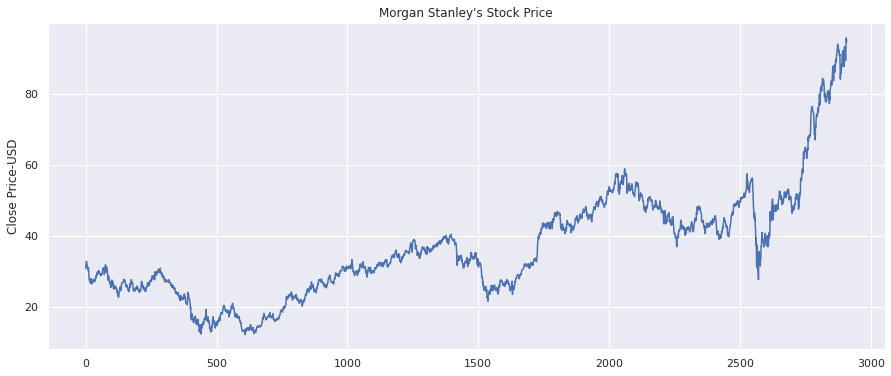

In [196]:
plt.figure(figsize=(15,6))
sns.set()
plt.title("Morgan Stanley's Stock Price")

plt.ylabel('Close Price-USD')
plt.plot(ms["close"])

In [197]:
ms[['divCash','splitFactor']]

,divCash,splitFactor
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
2904,0.0,1.0
2905,0.0,1.0
2906,0.0,1.0
2907,0.0,1.0


What will be the percentage change/ return of closing stock prices one month into the future 

In [198]:
ms['Return'] = ms['close'].pct_change(60).shift(-60)
List_of_Features = ['open','high','low','close','volume','adjClose','adjHigh','adjLow','adjOpen','adjVolume']

In [199]:
X = ms[List_of_Features]
y = np.where(ms.Return > 0, 1, 0)

In [200]:
X

,open,high,low,close,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,30.70,31.968,30.63,30.91,20371000,25.518330,26.391782,25.287171,25.344961,20371000
1,31.01,32.130,30.93,32.04,22523400,26.451223,26.525524,25.534842,25.600887,22523400
2,31.97,32.590,31.79,32.45,17028500,26.789706,26.905286,26.244831,26.393433,17028500
3,32.46,33.270,32.27,32.92,18693000,27.177724,27.466673,26.641104,26.797962,18693000
4,32.60,32.820,31.98,32.25,15993400,26.624593,27.095167,26.401689,26.913542,15993400
...,...,...,...,...,...,...,...,...,...,...
2904,89.51,89.690,87.58,89.35,14042974,89.350000,89.690000,87.580000,89.510000,14042974
2905,89.14,93.600,89.00,92.32,11522283,92.320000,93.600000,89.000000,89.140000,11522283
2906,93.24,96.050,93.18,95.68,14116881,95.680000,96.050000,93.180000,93.240000,14116881
2907,95.42,96.230,94.84,95.57,9235275,95.570000,96.230000,94.840000,95.420000,9235275


In [201]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [202]:
ms

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Return
0,MS,2010-01-04 00:00:00+00:00,30.91,31.968,30.63,30.70,20371000,25.518330,26.391782,25.287171,25.344961,20371000,0.0,1.0,-0.052410
1,MS,2010-01-05 00:00:00+00:00,32.04,32.130,30.93,31.01,22523400,26.451223,26.525524,25.534842,25.600887,22523400,0.0,1.0,-0.088639
2,MS,2010-01-06 00:00:00+00:00,32.45,32.590,31.79,31.97,17028500,26.789706,26.905286,26.244831,26.393433,17028500,0.0,1.0,-0.097381
3,MS,2010-01-07 00:00:00+00:00,32.92,33.270,32.27,32.46,18693000,27.177724,27.466673,26.641104,26.797962,18693000,0.0,1.0,-0.108141
4,MS,2010-01-08 00:00:00+00:00,32.25,32.820,31.98,32.60,15993400,26.624593,27.095167,26.401689,26.913542,15993400,0.0,1.0,-0.069147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,MS,2021-07-19 00:00:00+00:00,89.35,89.690,87.58,89.51,14042974,89.350000,89.690000,87.580000,89.510000,14042974,0.0,1.0,NaN
2905,MS,2021-07-20 00:00:00+00:00,92.32,93.600,89.00,89.14,11522283,92.320000,93.600000,89.000000,89.140000,11522283,0.0,1.0,NaN
2906,MS,2021-07-21 00:00:00+00:00,95.68,96.050,93.18,93.24,14116881,95.680000,96.050000,93.180000,93.240000,14116881,0.0,1.0,NaN
2907,MS,2021-07-22 00:00:00+00:00,95.57,96.230,94.84,95.42,9235275,95.570000,96.230000,94.840000,95.420000,9235275,0.0,1.0,NaN


In [203]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2036, 10)
(873, 10)
(2036,)
(873,)


min_samples_leaf specifies the minimum number of samples required to be at a leaf node.

In [204]:
treeClassifier = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 6)
treeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [205]:
y_pred = treeClassifier.predict(X_test)

In [206]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.37      0.46       352
           1       0.66      0.84      0.74       521

    accuracy                           0.65       873
   macro avg       0.64      0.61      0.60       873
weighted avg       0.64      0.65      0.63       873



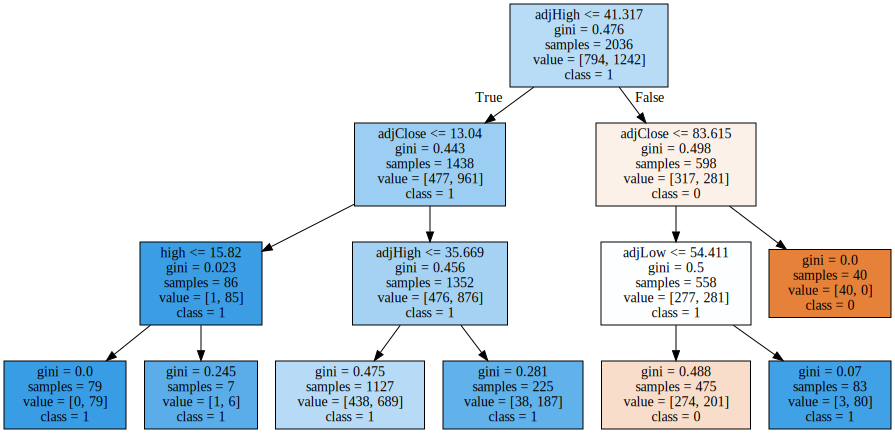

In [207]:
data =tree.export_graphviz(treeClassifier,filled=True,feature_names=List_of_Features,class_names = np.array(['0','1'])) 
graphviz.Source(data)

In [208]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
import itertools

#Prints the AUC scores for training and testing data
   #and returns testing score

In [209]:
def get_auc_scores(clf, X_train, X_test, y_train, y_test):
    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1] 
    auc_train = roc_auc_score(y_train, y_train_score)
    auc_test = roc_auc_score(y_test, y_test_score) 
    
 
    return y_test_score

 “””Plot ROC curve for testing data”””

In [210]:
def plot_roc_curve(y_test, y_test_score):
    fpr, tpr, _ = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr) 
    plt.figure()
    plt.plot(fpr, tpr, label  = "ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [211]:
y_test_score = get_auc_scores(treeClassifier, X_train, X_test, y_train, y_test)

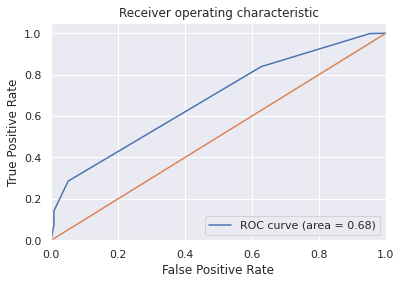

In [212]:
plot_roc_curve(y_test, y_test_score)

In [213]:
ms1=ms.reset_index()['close']

In [214]:
ms1

0       30.91
1       32.04
2       32.45
3       32.92
4       32.25
        ...  
2904    89.35
2905    92.32
2906    95.68
2907    95.57
2908    94.55
Name: close, Length: 2909, dtype: float64

In [215]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
ms1=scaler.fit_transform(np.array(ms1).reshape(-1,1))

In [216]:
training_size=int(len(ms1)*0.65)
test_size=len(ms1)-training_size
train_data,test_data=ms1[0:training_size,:],ms1[training_size:len(ms1),:1]

In [217]:
training_size,test_size

(1890, 1019)

In [218]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [219]:
print(X_train.shape), print(y_train.shape)

(1789, 100)
(1789,)


(None, None)

In [220]:
print(X_test.shape), print(y_test.shape)

(918, 100)
(918,)


(None, None)

In [221]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [228]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
28/28 [==============================] - 29s 676ms/step - loss: 0.0085 - val_loss: 0.0099
Epoch 2/100
28/28 [==============================] - 13s 461ms/step - loss: 7.5174e-04 - val_loss: 0.0019
Epoch 3/100
28/28 [==============================] - 13s 473ms/step - loss: 4.1165e-04 - val_loss: 0.0015
Epoch 4/100
28/28 [==============================] - 11s 378ms/step - loss: 3.1977e-04 - val_loss: 0.0015
Epoch 5/100
28/28 [==============================] - 11s 406ms/step - loss: 3.1961e-04 - val_loss: 0.0014
Epoch 6/100
28/28 [==============================] - 11s 391ms/step - loss: 2.8841e-04 - val_loss: 0.0014
Epoch 7/100
28/28 [==============================] - 10s 345ms/step - loss: 2.7869e-04 - val_loss: 0.0015
Epoch 8/100
28/28 [==============================] - 13s 465ms/step - loss: 2.5935e-04 - val_loss: 0.0014
Epoch 9/100
28/28 [==============================] - 13s 467ms/step - loss: 2.6231e-04 - val_loss: 0.0012
Epoch 10/100
28/28 [==============================

28/28 [==============================] - 11s 397ms/step - loss: 7.1540e-05 - val_loss: 3.7644e-04
Epoch 76/100
28/28 [==============================] - 10s 350ms/step - loss: 7.1490e-05 - val_loss: 2.5392e-04
Epoch 77/100
28/28 [==============================] - 10s 365ms/step - loss: 7.2217e-05 - val_loss: 2.4290e-04
Epoch 78/100
28/28 [==============================] - 10s 374ms/step - loss: 6.8019e-05 - val_loss: 2.2845e-04
Epoch 79/100
28/28 [==============================] - 10s 354ms/step - loss: 6.8342e-05 - val_loss: 3.0054e-04
Epoch 80/100
28/28 [==============================] - 10s 342ms/step - loss: 7.1153e-05 - val_loss: 2.4925e-04
Epoch 81/100
28/28 [==============================] - 10s 376ms/step - loss: 6.5653e-05 - val_loss: 2.1574e-04
Epoch 82/100
28/28 [==============================] - 9s 329ms/step - loss: 7.1471e-05 - val_loss: 4.6158e-04
Epoch 83/100
28/28 [==============================] - 11s 379ms/step - loss: 8.3254e-05 - val_loss: 3.8287e-04
Epoch 84/100
28

In [230]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [231]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [232]:


### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))



29.150992345522813

In [234]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

54.447182986113134

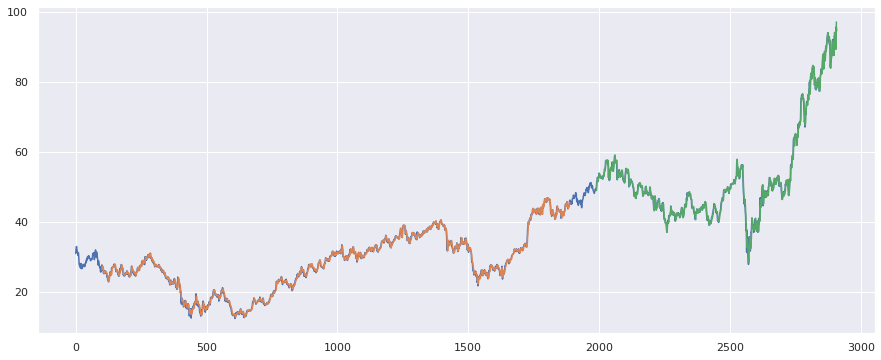

In [237]:


### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(ms1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(ms1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(ms1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(ms1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [238]:
len(test_data)

1019

In [240]:
x_input=test_data[919:].reshape(1,-1)
x_input.shape

(1, 100)

In [241]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [242]:


# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)



[0.98016626]
101
1 day input [0.82513202 0.82225156 0.825012   0.82201152 0.84889582 0.85081613
 0.86389822 0.8581373  0.84229477 0.8581373  0.85909746 0.84709554
 0.83485358 0.8012482  0.8037686  0.81337014 0.81156985 0.78636582
 0.80088814 0.7837254  0.79044647 0.78780605 0.80088814 0.80028805
 0.81421027 0.82045127 0.81397024 0.80616899 0.82129141 0.82165146
 0.79488718 0.81216995 0.77928469 0.80280845 0.79128661 0.82321171
 0.83005281 0.83533365 0.84457513 0.85549688 0.84241479 0.84133461
 0.84349496 0.86593855 0.89378301 0.90422468 0.88946231 0.87085934
 0.85597696 0.87013922 0.900024   0.90890542 0.89546327 0.88442151
 0.88946231 0.9119059  0.9281085  0.9181469  0.92402784 0.93542967
 0.94323092 0.95715314 0.96495439 0.97203553 0.9793567  0.97035526
 0.96531445 0.96387422 0.95199232 0.95643303 0.94047048 0.94023044
 0.9450312  0.90674508 0.86089774 0.8831013  0.88022084 0.88226116
 0.89678349 0.91262602 0.90422468 0.93951032 0.95211234 0.95607297
 0.95619299 0.9343495  0.93218915

9 day output [[1.0136425]]
10 day input [0.8581373  0.85909746 0.84709554 0.83485358 0.8012482  0.8037686
 0.81337014 0.81156985 0.78636582 0.80088814 0.7837254  0.79044647
 0.78780605 0.80088814 0.80028805 0.81421027 0.82045127 0.81397024
 0.80616899 0.82129141 0.82165146 0.79488718 0.81216995 0.77928469
 0.80280845 0.79128661 0.82321171 0.83005281 0.83533365 0.84457513
 0.85549688 0.84241479 0.84133461 0.84349496 0.86593855 0.89378301
 0.90422468 0.88946231 0.87085934 0.85597696 0.87013922 0.900024
 0.90890542 0.89546327 0.88442151 0.88946231 0.9119059  0.9281085
 0.9181469  0.92402784 0.93542967 0.94323092 0.95715314 0.96495439
 0.97203553 0.9793567  0.97035526 0.96531445 0.96387422 0.95199232
 0.95643303 0.94047048 0.94023044 0.9450312  0.90674508 0.86089774
 0.8831013  0.88022084 0.88226116 0.89678349 0.91262602 0.90422468
 0.93951032 0.95211234 0.95607297 0.95619299 0.9343495  0.93218915
 0.90350456 0.93578973 0.96483437 0.97035526 0.96135382 0.96339414
 0.94683149 0.92402784 0.9

20 day output [[1.0487022]]
21 day input [0.79044647 0.78780605 0.80088814 0.80028805 0.81421027 0.82045127
 0.81397024 0.80616899 0.82129141 0.82165146 0.79488718 0.81216995
 0.77928469 0.80280845 0.79128661 0.82321171 0.83005281 0.83533365
 0.84457513 0.85549688 0.84241479 0.84133461 0.84349496 0.86593855
 0.89378301 0.90422468 0.88946231 0.87085934 0.85597696 0.87013922
 0.900024   0.90890542 0.89546327 0.88442151 0.88946231 0.9119059
 0.9281085  0.9181469  0.92402784 0.93542967 0.94323092 0.95715314
 0.96495439 0.97203553 0.9793567  0.97035526 0.96531445 0.96387422
 0.95199232 0.95643303 0.94047048 0.94023044 0.9450312  0.90674508
 0.86089774 0.8831013  0.88022084 0.88226116 0.89678349 0.91262602
 0.90422468 0.93951032 0.95211234 0.95607297 0.95619299 0.9343495
 0.93218915 0.90350456 0.93578973 0.96483437 0.97035526 0.96135382
 0.96339414 0.94683149 0.92402784 0.95967355 1.         0.99867979
 0.98643783 0.98016626 0.97826439 0.98046613 0.98580915 0.99267906
 0.99941844 1.00492132 

29 day output [[1.0762998]]
[[0.9801662564277649], [0.9782643914222717], [0.9804661273956299], [0.9858091473579407], [0.9926790595054626], [0.9994184374809265], [1.004921317100525], [1.0088579654693604], [1.0115476846694946], [1.0136425495147705], [1.015790581703186], [1.0184069871902466], [1.021600604057312], [1.0252326726913452], [1.0290446281433105], [1.032788872718811], [1.03631591796875], [1.0395941734313965], [1.0426852703094482], [1.0456907749176025], [1.0487022399902344], [1.051770806312561], [1.054901123046875], [1.0580651760101318], [1.0612231492996216], [1.0643411874771118], [1.0674021244049072], [1.0704069137573242], [1.0733678340911865], [1.076299786567688]]


In [243]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [244]:
import matplotlib.pyplot as plt

In [245]:
len(ms1)

2909

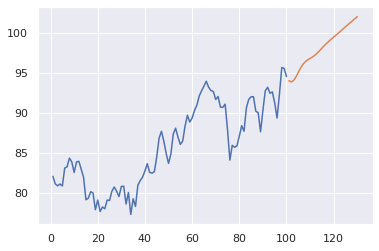

In [246]:
plt.plot(day_new,scaler.inverse_transform(ms1[2809:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

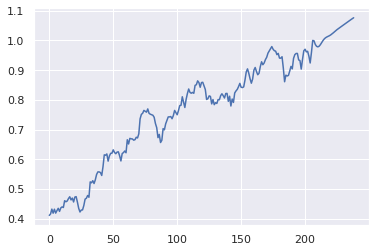

In [252]:
ms2=ms1.tolist()
ms2.extend(lst_output)
plt.plot(ms2[2700:])

In [250]:
ms2=scaler.inverse_transform(ms2).tolist()

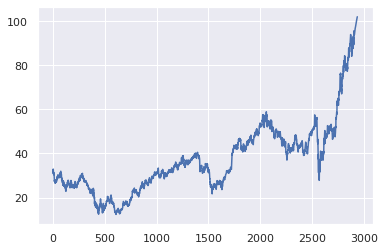

In [251]:
plt.plot(ms2)